In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Load dataset
data = pd.read_csv('diabetes.csv')
print(data.head())
# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("---------------------------------------------------------")
print(X_train)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
---------------------------------------------------------
[[1.00e+00 9.00e+01 6.20e+01 ... 2.72e+01 5.80e-01 2.40e+01]
 [5.00e+00 1.26e+02 7.80e+01 ... 2.96e+01 4.39e-01 4.00e+01]
 [2.00e+00 1.05e+02 5.80e+01 ... 3.49e+01 2.25e-01 2.50e+01]
 ...
 [1.00e+00 9.70e+01 7.00e+01 ... 3.81e+01 2.18e-01 3.00e+01]
 [1.00e+01 1.11e+02 7.00e+01 ... 2.75e+01 1.41e-01 4.00e+01]
 [4.00e+00 1.44e+02 5.80e+01 ... 2.95e+01 2.87e-01 3.70e+01]]


In [5]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Simple Neural Network Model

In [7]:
# Build a simple neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=1)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7301 - recall: 0.7343 - val_loss: 0.6571 - val_recall: 0.5741
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6390 - recall: 0.6199 - val_loss: 0.5997 - val_recall: 0.5185
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5731 - recall: 0.5340 - val_loss: 0.5631 - val_recall: 0.4815
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5393 - recall: 0.5128 - val_loss: 0.5387 - val_recall: 0.5000
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5109 - recall: 0.5443 - val_loss: 0.5230 - val_recall: 0.5185
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5039 - recall: 0.5470 - val_loss: 0.5149 - val_recall: 0.5370
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4588 - recall: 0.6638 - val_loss: 0.5066 - val_recall: 0.5556
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4557 - recall: 0.6267 - val_loss: 0.5014 - val_recall: 0.6111
Epoch 9/100
62/6

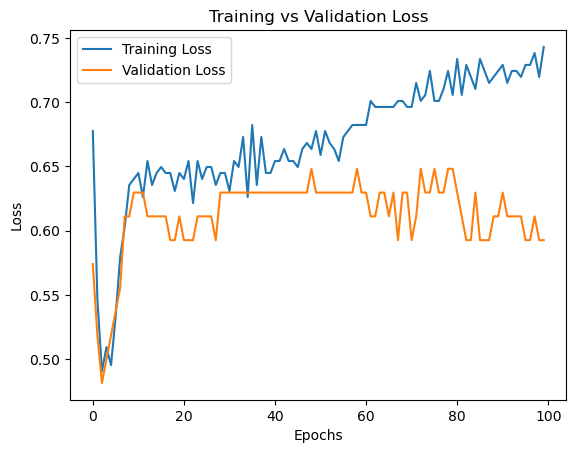

In [11]:
# Plot training vs validation loss
plt.plot(history.history['recall'], label='Training Loss')
plt.plot(history.history['val_recall'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

#### Tuning with learning rates

Training with learning rate: 0.01


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with learning rate: 0.001
Training with learning rate: 0.0001


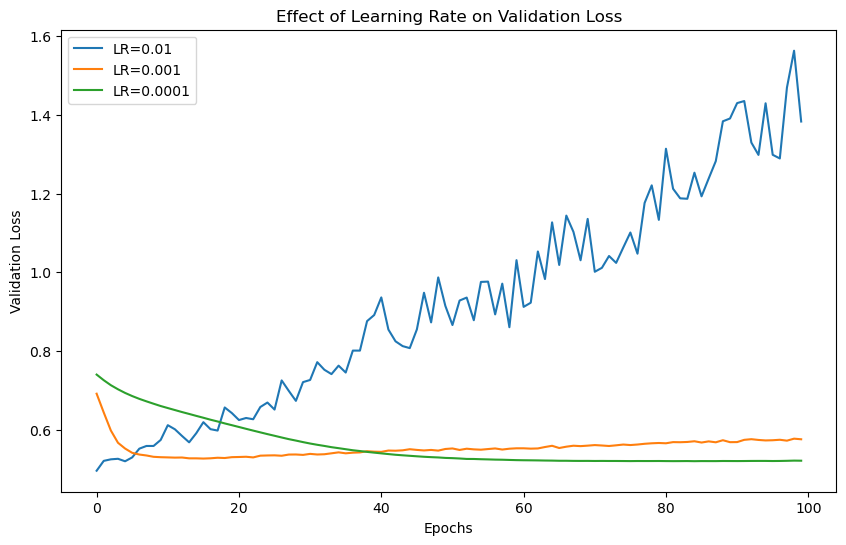

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different learning rates
learning_rates = [0.01, 0.001, 0.0001]

# Store history for each learning rate
histories = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=0)
    histories[lr] = history

# Plot training vs validation loss for different learning rates
plt.figure(figsize=(10, 6))
for lr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of Learning Rate on Validation Loss')
plt.show()


#### Tuning with batch sizes

Training with batch size: 8


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with batch size: 16
Training with batch size: 32


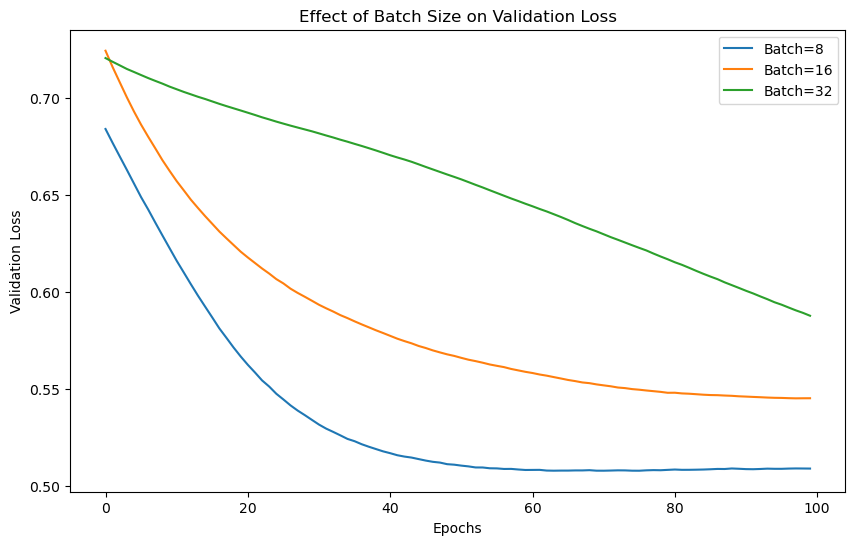

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimal learning rate from previous tuning
learning_rate = 0.0001

# Define different batch sizes
batch_sizes = [8, 16, 32]

# Store history for each batch size
histories = {}

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=0)
    histories[batch_size] = history

# Plot training vs validation loss for different batch sizes
plt.figure(figsize=(10, 6))
for batch_size, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Batch={batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of Batch Size on Validation Loss')
plt.show()


#### No of neurons and depth tuning

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Shallow Network
Training Balanced Network
Training Deep Network


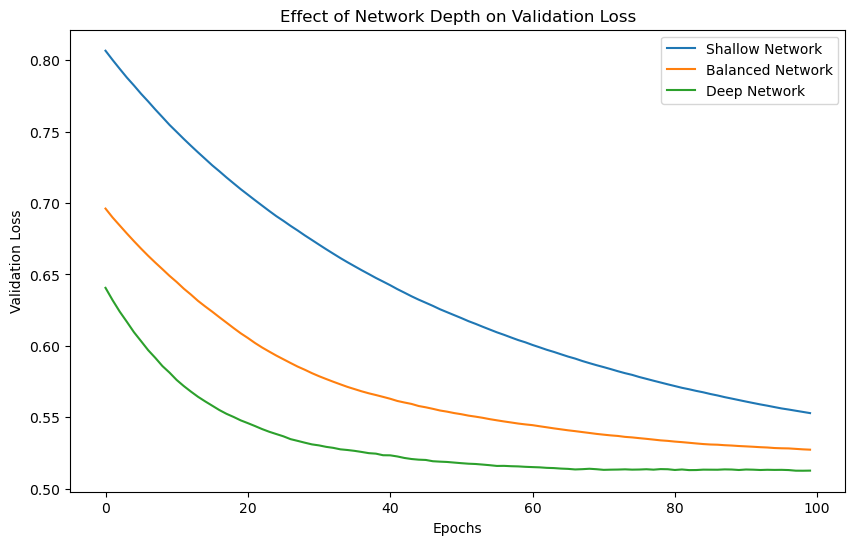

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimal hyperparameters from previous tuning
learning_rate = 0.0001
batch_size = 16

# Define different architectures
architectures = {
    "Shallow": [Dense(8, activation='relu', input_shape=(X_train.shape[1],)), Dense(1, activation='sigmoid')],
    "Balanced": [Dense(16, activation='relu', input_shape=(X_train.shape[1],)), Dense(8, activation='relu'), Dense(1, activation='sigmoid')],
    "Deep": [Dense(32, activation='relu', input_shape=(X_train.shape[1],)), Dense(16, activation='relu'), Dense(8, activation='relu'), Dense(1, activation='sigmoid')]
}

# Store history for each architecture
histories = {}

for name, layers in architectures.items():
    print(f"Training {name} Network")
    model = Sequential(layers)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=0)
    histories[name] = history

# Plot training vs validation loss for different architectures
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} Network')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of Network Depth on Validation Loss')
plt.show()


#### Activation function tuning

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training with ReLU Activation
Training with Leaky ReLU Activation
Training with Tanh Activation
Training with Sigmoid Activation


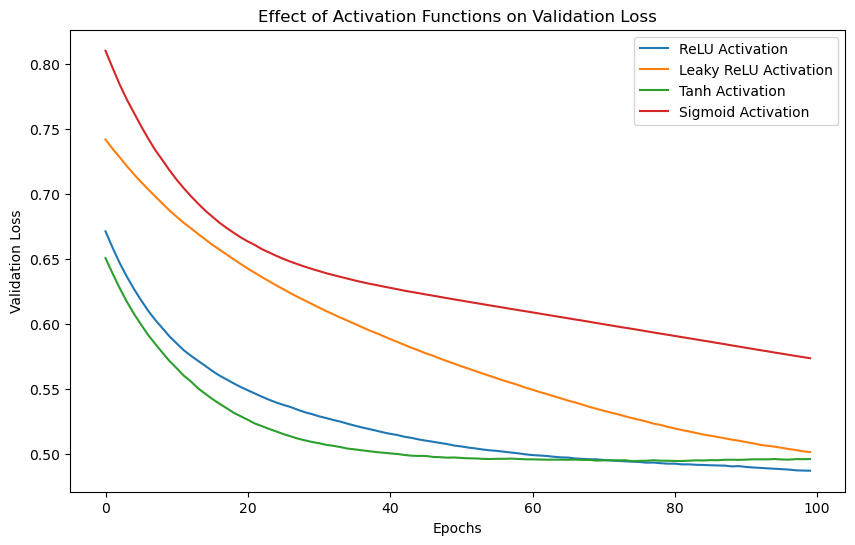

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimal hyperparameters from previous tuning
learning_rate = 0.0001
batch_size = 16

# Define different activation functions
activations = {
    "ReLU": [Dense(16, activation='relu', input_shape=(X_train.shape[1],)), Dense(8, activation='relu'), Dense(1, activation='sigmoid')],
    "Leaky ReLU": [Dense(16, input_shape=(X_train.shape[1],)), LeakyReLU(alpha=0.01), Dense(8), LeakyReLU(alpha=0.01), Dense(1, activation='sigmoid')],
    "Tanh": [Dense(16, activation='tanh', input_shape=(X_train.shape[1],)), Dense(8, activation='tanh'), Dense(1, activation='sigmoid')],
    "Sigmoid": [Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)), Dense(8, activation='sigmoid'), Dense(1, activation='sigmoid')]
}

# Store history for each activation function
histories = {}

for name, layers in activations.items():
    print(f"Training with {name} Activation")
    model = Sequential(layers)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=0)
    histories[name] = history

# Plot training vs validation loss for different activations
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} Activation')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of Activation Functions on Validation Loss')
plt.show()


#### Dropout rate tuning

Training with Dropout 0.1


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Dropout 0.3
Training with Dropout 0.5


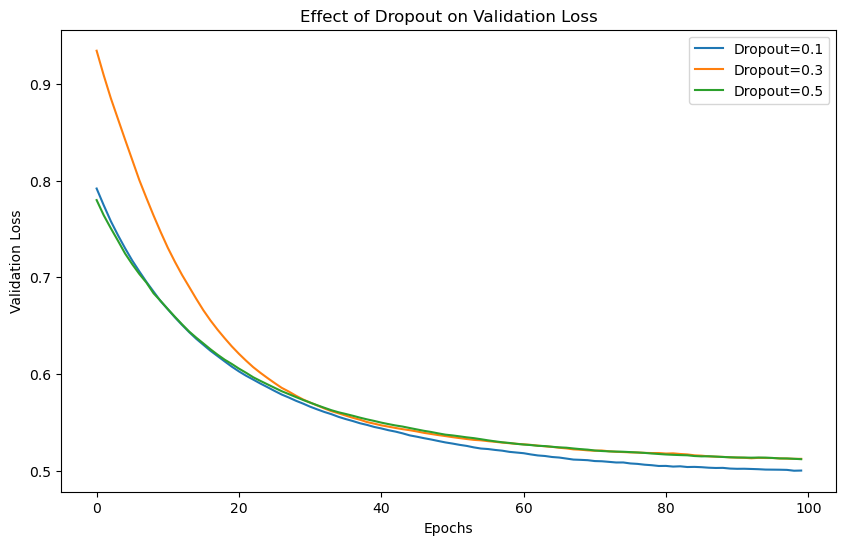

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimal hyperparameters from previous tuning
learning_rate = 0.0001
batch_size = 16
activation_function = 'tanh'

# Define different dropout rates
dropout_rates = [0.1, 0.3, 0.5]

# Store history for each dropout rate
histories = {}

for dropout_rate in dropout_rates:
    print(f"Training with Dropout {dropout_rate}")
    model = Sequential([
        Dense(16, activation=activation_function, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(8, activation=activation_function),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=0)
    histories[dropout_rate] = history

# Plot training vs validation loss for different dropout rates
plt.figure(figsize=(10, 6))
for dropout_rate, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Dropout={dropout_rate}')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of Dropout on Validation Loss')
plt.show()


#### L2 Regularization tuning

Training with L2 Regularization 0.001


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with L2 Regularization 0.01
Training with L2 Regularization 0.1


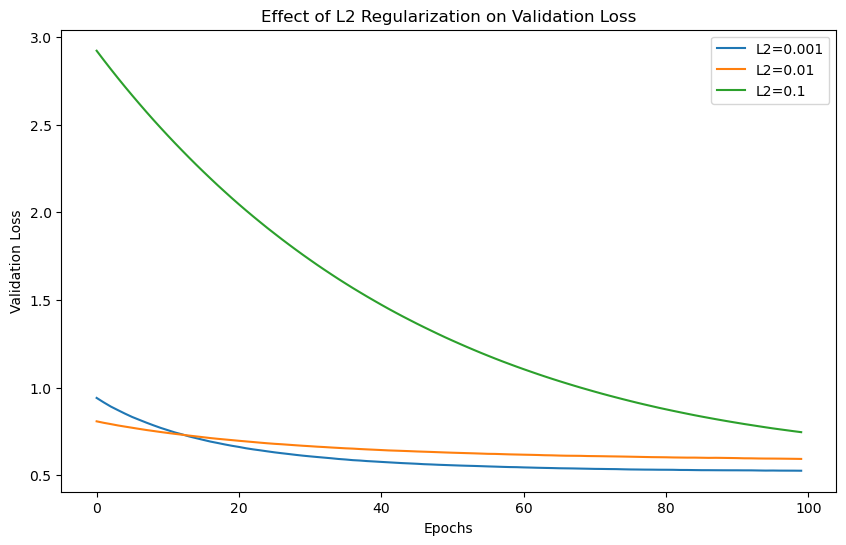

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimal hyperparameters from previous tuning
learning_rate = 0.0001
batch_size = 16
activation_function = 'tanh'
dropout_rate = 0.1

# Define different L2 regularization strengths
l2_values = [0.001, 0.01, 0.1]

# Store history for each L2 value
histories = {}

for l2_value in l2_values:
    print(f"Training with L2 Regularization {l2_value}")
    model = Sequential([
        Dense(16, activation=activation_function, kernel_regularizer=l2(l2_value), input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(8, activation=activation_function, kernel_regularizer=l2(l2_value)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=0)
    histories[l2_value] = history

# Plot training vs validation loss for different L2 values
plt.figure(figsize=(10, 6))
for l2_value, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'L2={l2_value}')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of L2 Regularization on Validation Loss')
plt.show()


#### Final model with best tuned parameters

Epoch 1/100


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3812 - loss: 0.9599 - val_accuracy: 0.3701 - val_loss: 1.0280
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4113 - loss: 0.9367 - val_accuracy: 0.3701 - val_loss: 0.9948
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4238 - loss: 0.9312 - val_accuracy: 0.3701 - val_loss: 0.9642
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4399 - loss: 0.9154 - val_accuracy: 0.3701 - val_loss: 0.9337
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4071 - loss: 0.8711 - val_accuracy: 0.3701 - val_loss: 0.9057
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4376 - loss: 0.8485 - val_accuracy: 0.3831 - val_loss: 0.8793
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4915 - loss: 0.8177 - val_accuracy: 0.4026 - val_loss: 0.8542
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4977 - loss: 0.8001 - val_accuracy: 0.4156 - val_loss: 0.

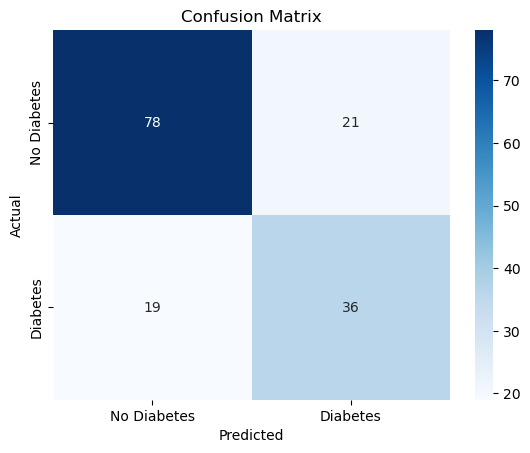

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Best hyperparameters after tuning
learning_rate = 0.0001
batch_size = 16
activation_function = 'tanh'
dropout_rate = 0.1
l2_value = 0.001

# Define the final optimized model
model = Sequential([
    Dense(16, activation=activation_function, kernel_regularizer=l2(l2_value), input_shape=(X_train.shape[1],)),
    Dropout(dropout_rate),
    Dense(8, activation=activation_function, kernel_regularizer=l2(l2_value)),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the final model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=1)

# Evaluate the final model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
